In [1]:
install.packages('fpp3', dependencies = TRUE)
library(fpp3)
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.2      ✔ tsibble     1.0.1 
✔ dplyr       1.0.6      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.2.1 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.3      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 1 Stationarity and differencing

## Differencing

In [4]:
# Re-index based on trading days
google_stock <- gafa_stock %>%
  filter(Symbol == "GOOG", year(Date) >= 2015) %>%
  mutate(day = row_number()) %>%
  update_tsibble(index = day, regular = TRUE)
# Filter the year of interest
google_2015 <- google_stock %>% filter(year(Date) == 2015)

Plot variable not specified, automatically selected `.vars = Close`



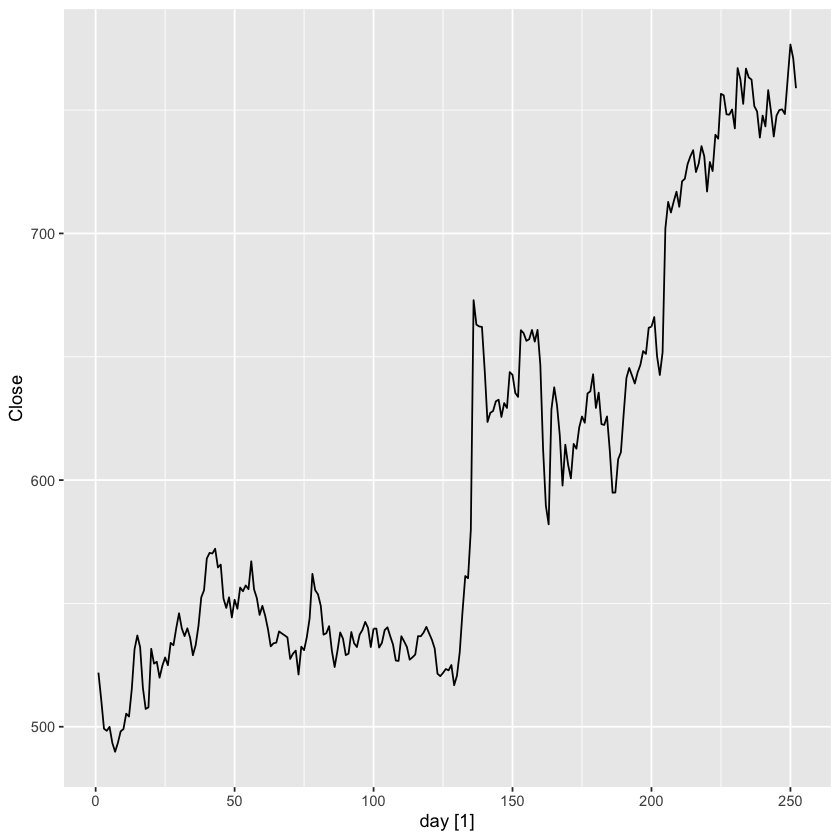

In [6]:
google_2015 %>%select(Close)%>%
  autoplot() 

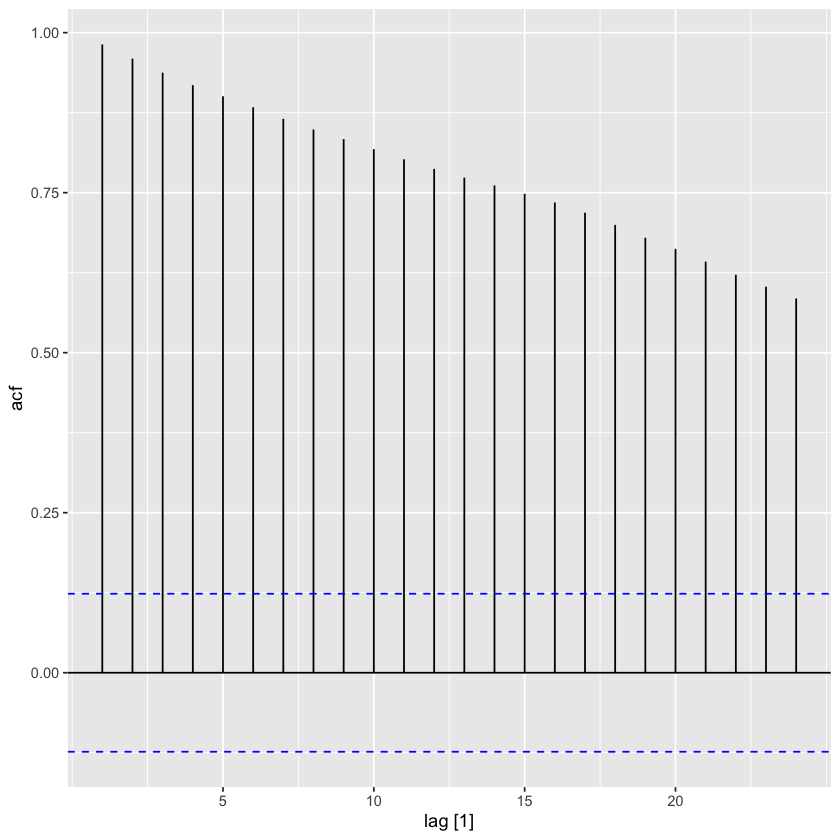

In [11]:
google_2015 %>%select(Close)%>%
ACF(Close, lag_max = 24)%>%
  autoplot() 

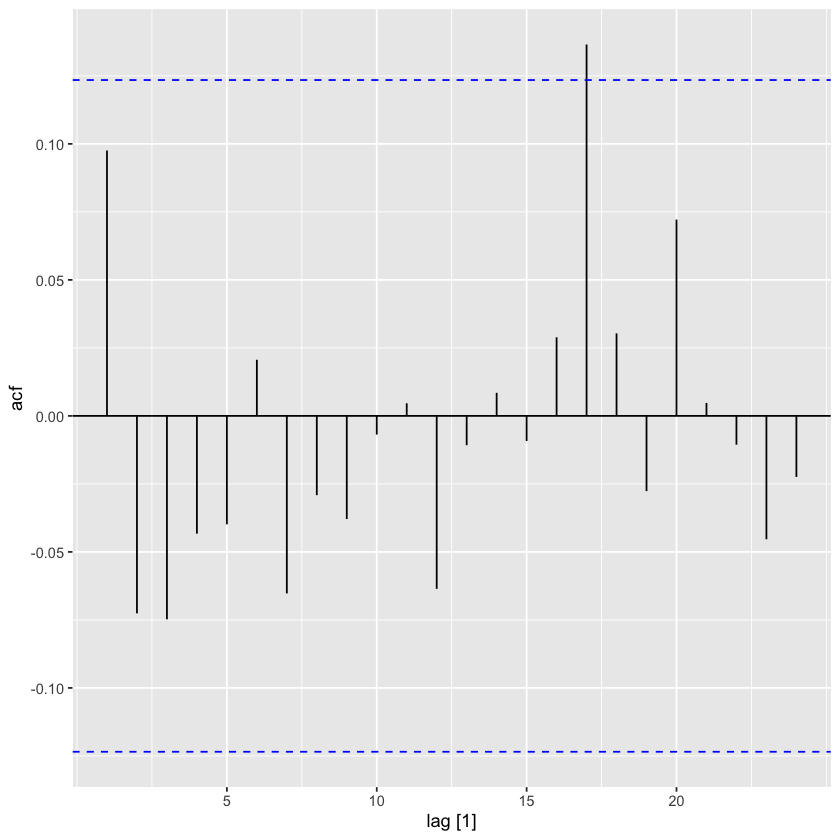

In [10]:
google_2015 %>%
mutate(diff_close = difference(Close)) %>%
ACF(diff_close, lag_max = 24)%>%
  autoplot() 

In [7]:
google_2015 %>%
 mutate(diff_close =difference(Close)) %>%
 features(diff_close, ljung_box, lag=10)

Symbol,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
GOOG,7.914143,0.6372231


- The ACF of the differenced Google stock price looks just like that of a white noise series.
- Only one autocorrelation is outside of the 95% limits, and the Ljung-Box  $Q^*$
  statistic has a p-value of 0.637 (for  $h=10$).
-  This suggests that the daily change in the Google stock price is essentially a random amount which is  $\text{uncorrelated}$ with that of previous days.


In [15]:
PBS %>%
  filter(ATC2 == "H02")

Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
<mth>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991 Jul,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,63261,317384.0
1991 Aug,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,53528,269891.0
1991 Sep,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,52822,269703.0
1991 Oct,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,54016,280418.0
1991 Nov,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,49281,268070.0
1991 Dec,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,51798,277139.0
1992 Jan,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,42436,221772.0
1992 Feb,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,52913,272345.0
1992 Mar,Concessional,Co-payments,H,"Systemic hormonal preparations, excl. sex hormones and insulins",H02,CORTICOSTEROIDS FOR SYSTEMIC USE,62908,325700.0


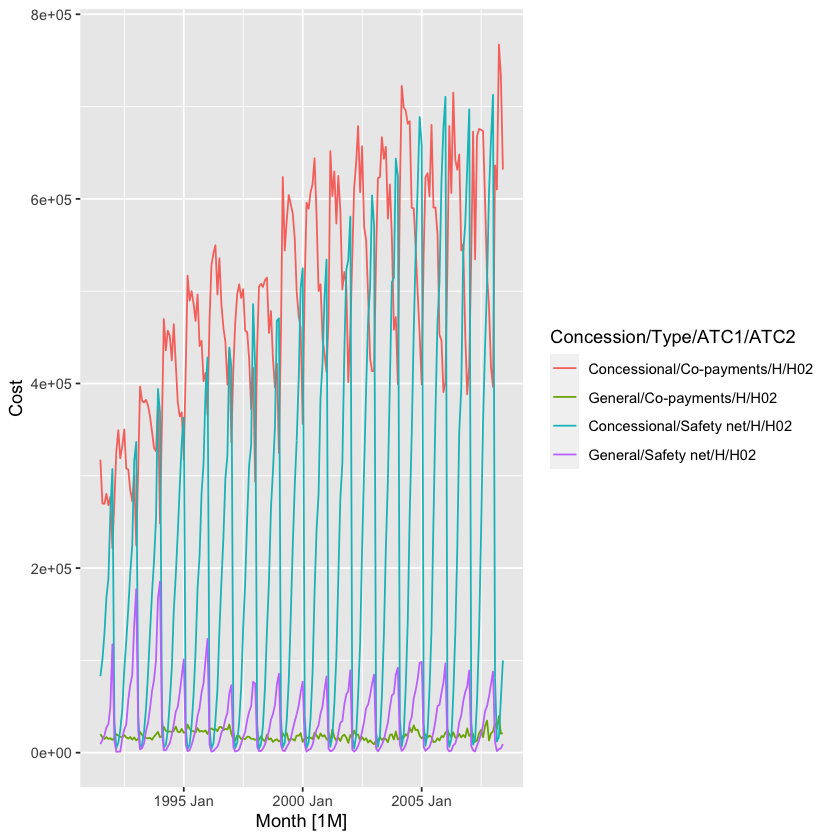

In [13]:
PBS %>%
  filter(ATC2 == "H02") %>%
  autoplot(Cost)

In [14]:
PBS %>%
  filter(ATC2 == "H02") %>%
  summarise(Cost = sum(Cost)/1e6)

Month,Cost
<mth>,<dbl>
1991 Jul,0.4297950
1991 Aug,0.4009060
1991 Sep,0.4321590
1991 Oct,0.4925430
1991 Nov,0.5023690
1991 Dec,0.6026520
1992 Jan,0.6601190
1992 Feb,0.3362200
1992 Mar,0.3513480


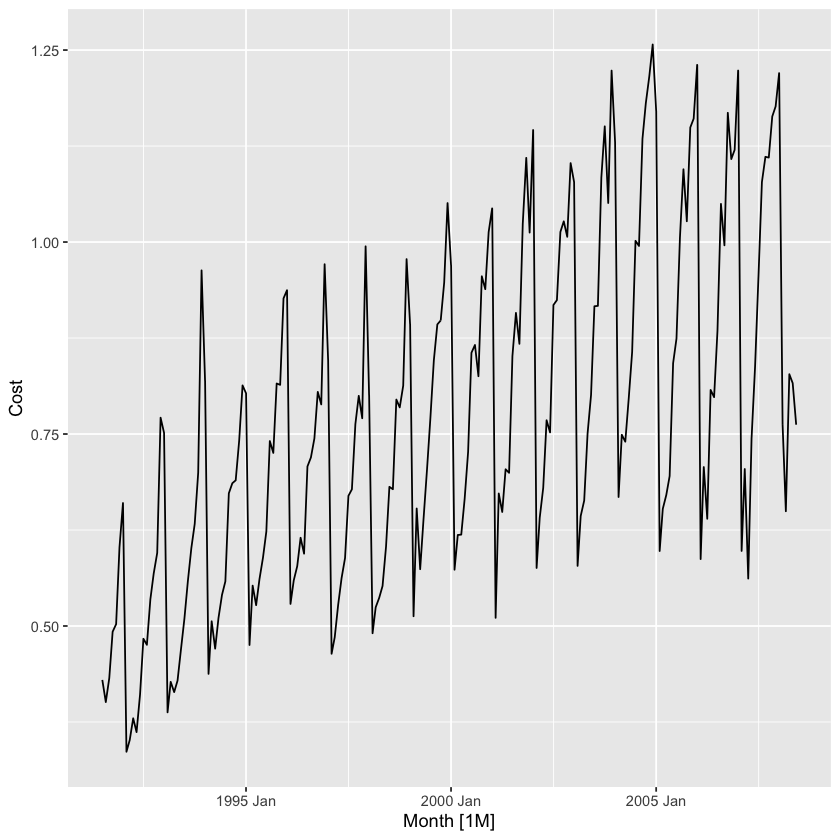

In [16]:
PBS %>%
  filter(ATC2 == "H02") %>%
  summarise(Cost = sum(Cost)/1e6) %>%
  autoplot(Cost)

In [17]:
PBS %>%
  filter(ATC2 == "H02") %>%
  summarise(Cost = sum(Cost)/1e6) %>%
  transmute(
    `Sales ($million)` = Cost,
    `Log sales` = log(Cost),
    `Annual change in log sales` = difference(log(Cost), 12),
    `Doubly differenced log sales` =
                     difference(difference(log(Cost), 12), 1)
  )

Month,Sales ($million),Log sales,Annual change in log sales,Doubly differenced log sales
<mth>,<dbl>,<dbl>,<dbl>,<dbl>
1991 Jul,0.4297950,-0.84444693,NA,NA
1991 Aug,0.4009060,-0.91402829,NA,NA
1991 Sep,0.4321590,-0.83896170,NA,NA
1991 Oct,0.4925430,-0.70817351,NA,NA
1991 Nov,0.5023690,-0.68842037,NA,NA
1991 Dec,0.6026520,-0.50641536,NA,NA
1992 Jan,0.6601190,-0.41533516,NA,NA
1992 Feb,0.3362200,-1.08998957,NA,NA
1992 Mar,0.3513480,-1.04597809,NA,NA


In [18]:
PBS %>%
  filter(ATC2 == "H02") %>%
  summarise(Cost = sum(Cost)/1e6) %>%
  transmute(
    `Sales ($million)` = Cost,
    `Log sales` = log(Cost),
    `Annual change in log sales` = difference(log(Cost), 12),
    `Doubly differenced log sales` =
                     difference(difference(log(Cost), 12), 1)
  ) %>%
  pivot_longer(-Month, names_to="Type", values_to="Sales") 

# I need to use pivote because i need to modify the data in form of types.

Month,Type,Sales
<mth>,<chr>,<dbl>
1991 Jul,Sales ($million),0.4297950
1991 Jul,Log sales,-0.8444469
1991 Jul,Annual change in log sales,NA
1991 Jul,Doubly differenced log sales,NA
1991 Aug,Sales ($million),0.4009060
1991 Aug,Log sales,-0.9140283
1991 Aug,Annual change in log sales,NA
1991 Aug,Doubly differenced log sales,NA
1991 Sep,Sales ($million),0.4321590


In [19]:
PBS %>%
  filter(ATC2 == "H02") %>%
  summarise(Cost = sum(Cost)/1e6) %>%
  transmute(
    `Sales ($million)` = Cost,
    `Log sales` = log(Cost),
    `Annual change in log sales` = difference(log(Cost), 12),
    `Doubly differenced log sales` =
                     difference(difference(log(Cost), 12), 1)
  ) %>%
  pivot_longer(-Month, names_to="Type", values_to="Sales") %>%
  mutate(
    Type = factor(Type, levels = c(
      "Sales ($million)",
      "Log sales",
      "Annual change in log sales",
      "Doubly differenced log sales"))
  )

Month,Type,Sales
<mth>,<fct>,<dbl>
1991 Jul,Sales ($million),0.4297950
1991 Jul,Log sales,-0.8444469
1991 Jul,Annual change in log sales,NA
1991 Jul,Doubly differenced log sales,NA
1991 Aug,Sales ($million),0.4009060
1991 Aug,Log sales,-0.9140283
1991 Aug,Annual change in log sales,NA
1991 Aug,Doubly differenced log sales,NA
1991 Sep,Sales ($million),0.4321590


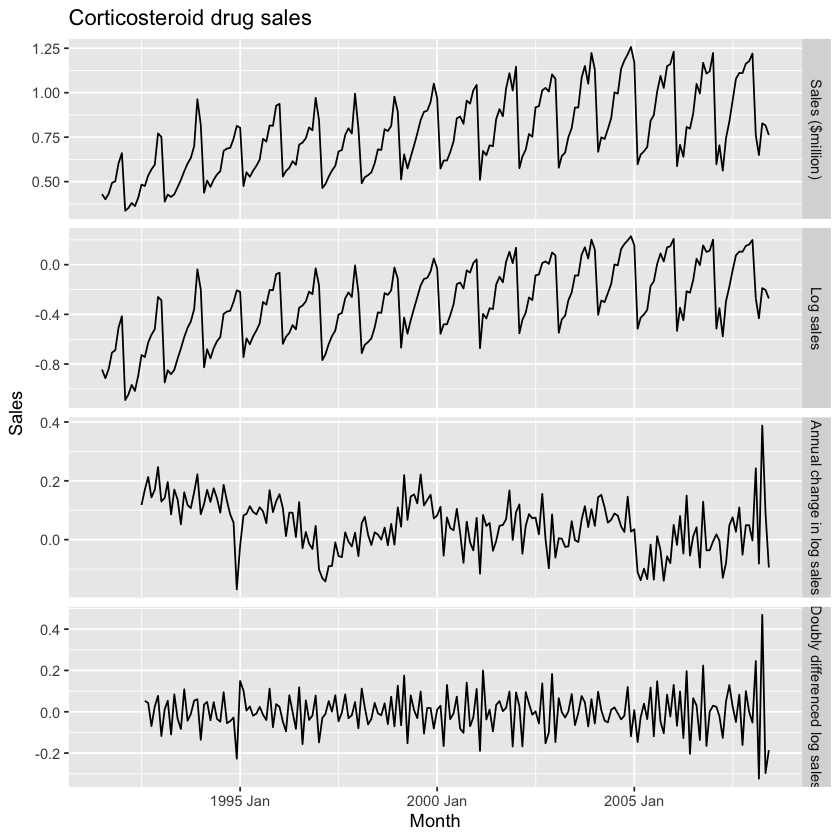

In [27]:
PBS %>%
  filter(ATC2 == "H02") %>%
  summarise(Cost = sum(Cost)/1e6) %>%
  transmute(
    `Sales ($million)` = Cost,
    `Log sales` = log(Cost),
    `Annual change in log sales` = difference(log(Cost), 12),
    `Doubly differenced log sales` =
                     difference(difference(log(Cost), 12), 1)
  ) %>%
  pivot_longer(-Month, names_to="Type", values_to="Sales") %>%
  mutate(
    Type = factor(Type, levels = c(
      "Sales ($million)",
      "Log sales",
      "Annual change in log sales",
      "Doubly differenced log sales"))
  ) %>%
  ggplot(aes(x = Month, y = Sales))+
geom_line()+
  facet_grid(vars(Type), scales = "free_y")+ # THis allow me to get separate 
                                            # graphs for each variable

  labs(title = "Corticosteroid drug sales", Y=NULL) # to eliminate the word sales.

## Unit root tests


In [28]:
google_2015

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume,day
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
GOOG,2015-01-02,526.1147,528.3624,521.2316,521.9377,521.9377,1447600,1
GOOG,2015-01-05,520.3962,521.4604,510.2520,511.0576,511.0576,2059800,2
GOOG,2015-01-06,512.1815,513.3500,498.3078,499.2128,499.2128,2899900,3
GOOG,2015-01-07,504.2252,504.4679,496.9154,498.3575,498.3575,2065100,4
GOOG,2015-01-08,495.2645,500.7245,488.3128,499.9289,499.9289,3353600,5
GOOG,2015-01-09,501.9975,502.1566,492.0821,493.4545,493.4545,2069400,6
GOOG,2015-01-12,492.2312,493.2616,484.8916,489.8543,489.8543,2322400,7
GOOG,2015-01-13,496.1099,500.2272,489.6952,493.4644,493.4644,2370500,8
GOOG,2015-01-14,491.9428,500.4759,490.3018,498.1288,498.1288,2235700,9


In [29]:
google_2015 %>%
 features(Close, unitroot_kpss)

Symbol,kpss_stat,kpss_pvalue
<chr>,<dbl>,<dbl>
GOOG,3.560958,0.01


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
- the null hypothesis is that the data are stationary, and we look for evidence that the null hypothesis is false

- The p-value is reported as 0.01 if it is less than 0.01, and as 0.1 if it is greater than 0.1. In this case, the test statistic (3.56) is bigger than the 1% critical value, so the p-value is less than 0.01, indicating that the null hypothesis is rejected. 
- That is, the data are not stationary. 

In [30]:
google_2015 %>%
 mutate(diff_close =difference(Close)) %>%
 features(diff_close, unitroot_kpss)

Symbol,kpss_stat,kpss_pvalue
<chr>,<dbl>,<dbl>
GOOG,0.0988669,0.1


- the test statistic is tiny, and well within the range we would expect for stationary data, so the p-value is greater than 0.1. 
- We can conclude that the differenced data appear stationary.

This process of using a sequence of KPSS tests to determine the appropriate number of first differences is carried out using the unitroot_ndiffs() feature

In [31]:
google_2015 %>%
  features(Close, unitroot_ndiffs)

Symbol,ndiffs
<chr>,<int>
GOOG,1


 ## Example 2

In [32]:
aus_retail

State,Industry,Series ID,Month,Turnover
<chr>,<chr>,<chr>,<mth>,<dbl>
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Apr,4.4
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 May,3.4
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jun,3.6
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jul,4.0
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Aug,3.6
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Sep,4.2
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Oct,4.8
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Nov,5.4
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Dec,6.9


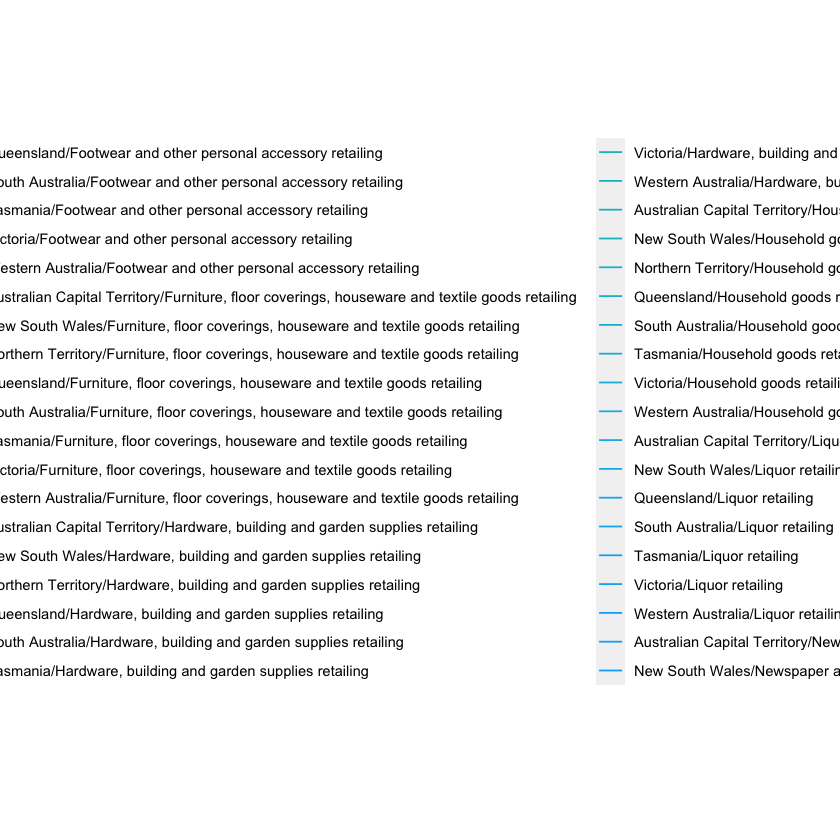

In [40]:
aus_retail %>% 
autoplot(Turnover)

In [34]:
aus_total_retail <- aus_retail %>%
  summarise(Turnover = sum(Turnover))

aus_total_retail

Month,Turnover
<mth>,<dbl>
1982 Apr,6225.3
1982 May,6382.4
1982 Jun,6161.8
1982 Jul,6398.8
1982 Aug,6163.4
1982 Sep,6330.9
1982 Oct,6535.2
1982 Nov,7021.7
1982 Dec,9321.8


Plot variable not specified, automatically selected `.vars = Turnover`



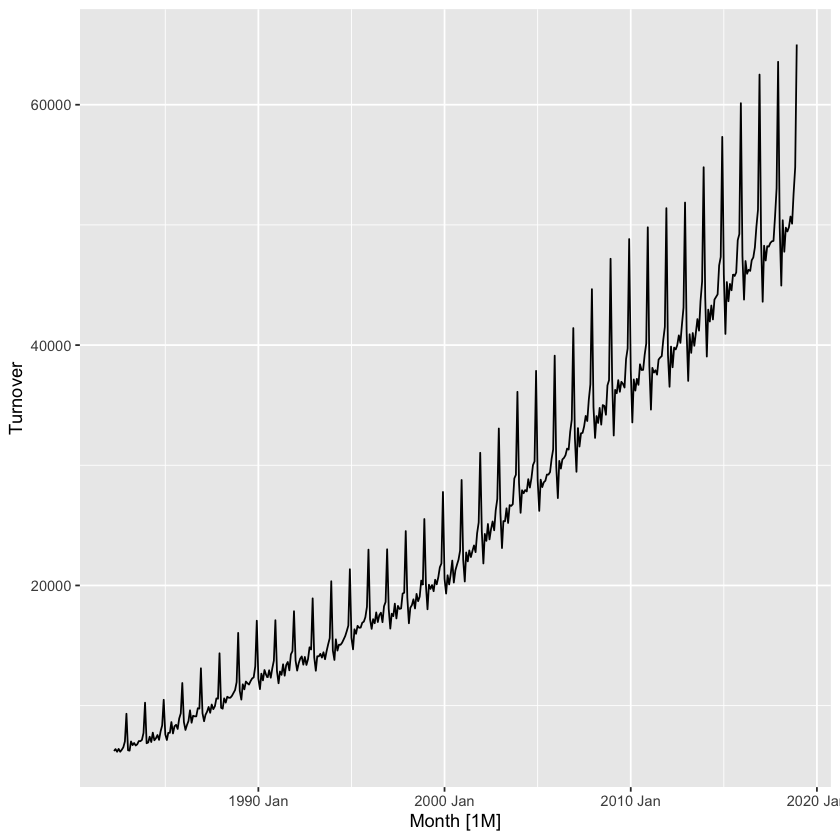

In [41]:
autoplot(aus_total_retail)

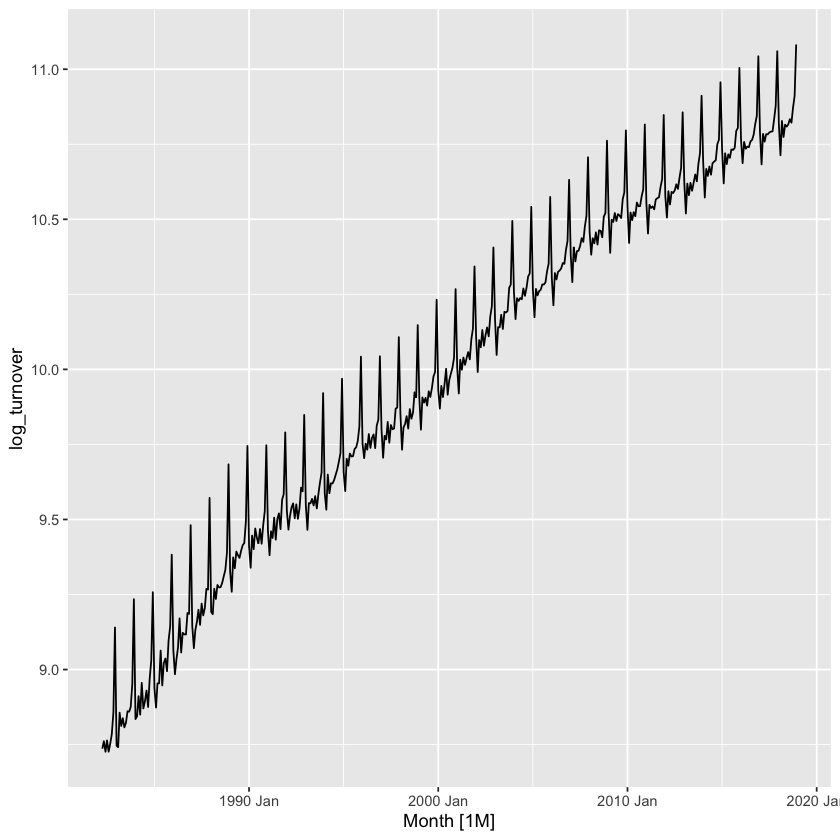

In [42]:
aus_total_retail %>%
  mutate(log_turnover = log(Turnover)) %>%
  autoplot(log_turnover)

In [43]:
aus_total_retail <- aus_retail %>%
  summarise(Turnover = sum(Turnover))
aus_total_retail %>%
  mutate(log_turnover = log(Turnover)) %>%
  features(log_turnover, unitroot_nsdiffs)

nsdiffs
<int>
1


In [44]:
aus_total_retail %>%
  mutate(log_turnover = difference(log(Turnover), 12)) %>%
  features(log_turnover, unitroot_ndiffs)

ndiffs
<int>
1


- Because unitroot_nsdiffs() returns 1 (indicating one seasonal difference is required), we apply the unitroot_ndiffs() function to the seasonally differenced data.
- These functions suggest we should do both a seasonal difference and a first difference.

# 2. Non-Seasonal ARIMA models

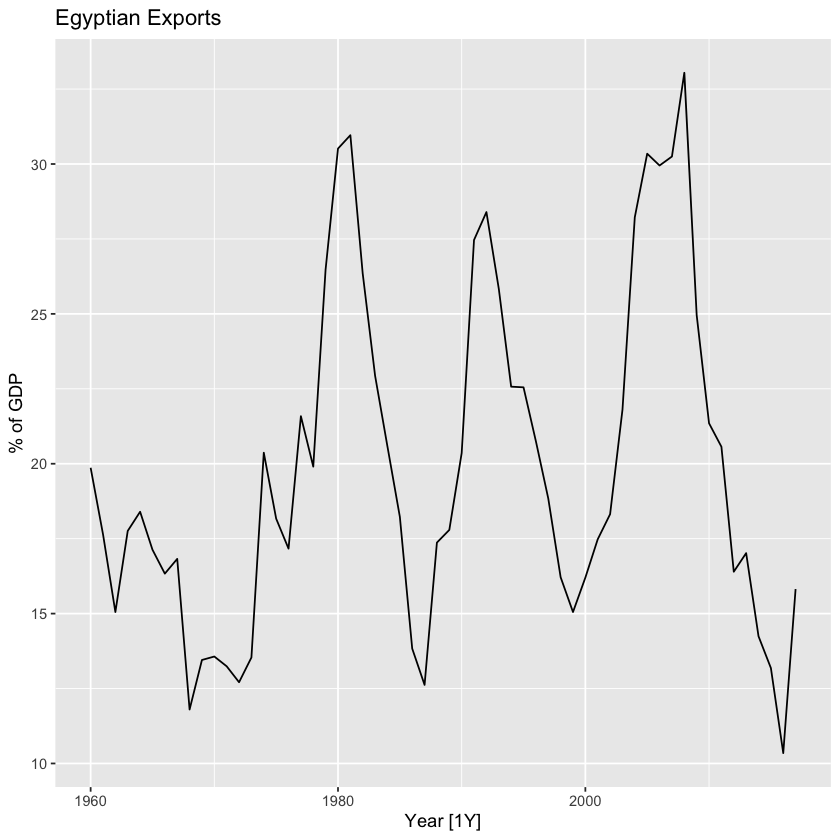

In [45]:
global_economy %>%
 filter(Code=="EGY") %>%
 autoplot(Exports)+
  labs(y = "% of GDP", title = "Egyptian Exports")

### The following R code selects a non-seasonal ARIMA model automatically:


In [47]:
fit <- global_economy %>%
 filter(Code == "EGY") %>%
 model(
      ARIMA(Exports)
      )

report(fit)

Series: Exports 
Model: ARIMA(2,0,1) w/ mean 

Coefficients:
         ar1      ar2      ma1  constant
      1.6764  -0.8034  -0.6896    2.5623
s.e.  0.1111   0.0928   0.1492    0.1161

sigma^2 estimated as 8.046:  log likelihood=-141.57
AIC=293.13   AICc=294.29   BIC=303.43


In [48]:
augment(fit)

Country,.model,Year,Exports,.fitted,.resid,.innov
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Egypt, Arab Rep.",ARIMA(Exports),1960,19.86619,20.02228,-0.15609101,-0.15609101
"Egypt, Arab Rep.",ARIMA(Exports),1961,17.64631,19.70285,-2.05654564,-2.05654564
"Egypt, Arab Rep.",ARIMA(Exports),1962,15.05238,17.37092,-2.31853564,-2.31853564
"Egypt, Arab Rep.",ARIMA(Exports),1963,17.75886,15.20143,2.55743125,2.55743125
"Egypt, Arab Rep.",ARIMA(Exports),1964,18.39805,18.50820,-0.11015029,-0.11015029
"Egypt, Arab Rep.",ARIMA(Exports),1965,17.13088,19.20470,-2.07382699,-2.07382699
"Egypt, Arab Rep.",ARIMA(Exports),1966,16.33337,17.92130,-1.58792240,-1.58792240
"Egypt, Arab Rep.",ARIMA(Exports),1967,16.82579,17.27357,-0.44778054,-0.44778054
"Egypt, Arab Rep.",ARIMA(Exports),1968,11.79992,17.95308,-6.15315611,-6.15315611


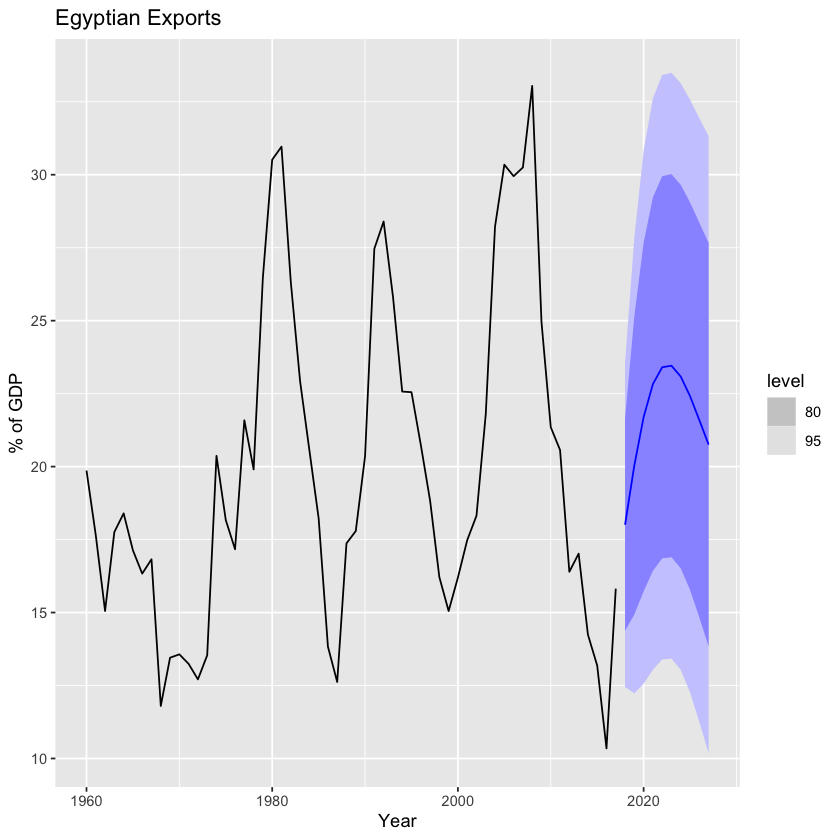

In [49]:
fit %>% forecast(h=10) %>%
 autoplot(global_economy)+
  labs(y = "% of GDP", title = "Egyptian Exports")

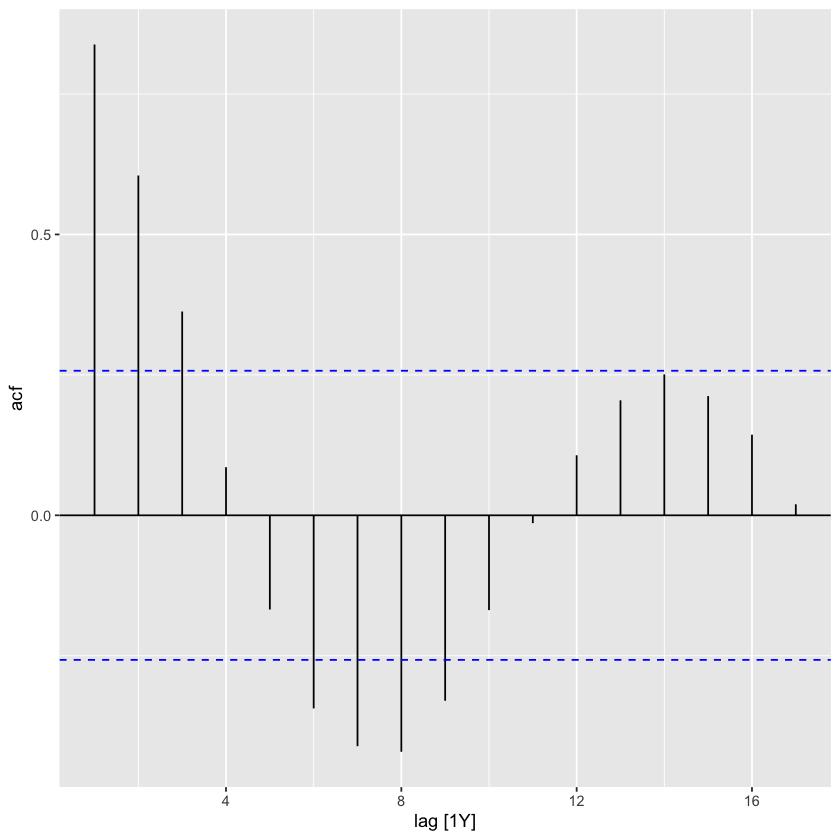

In [50]:
global_economy %>%
  filter(Code == "EGY") %>%
  ACF(Exports) %>%
  autoplot()

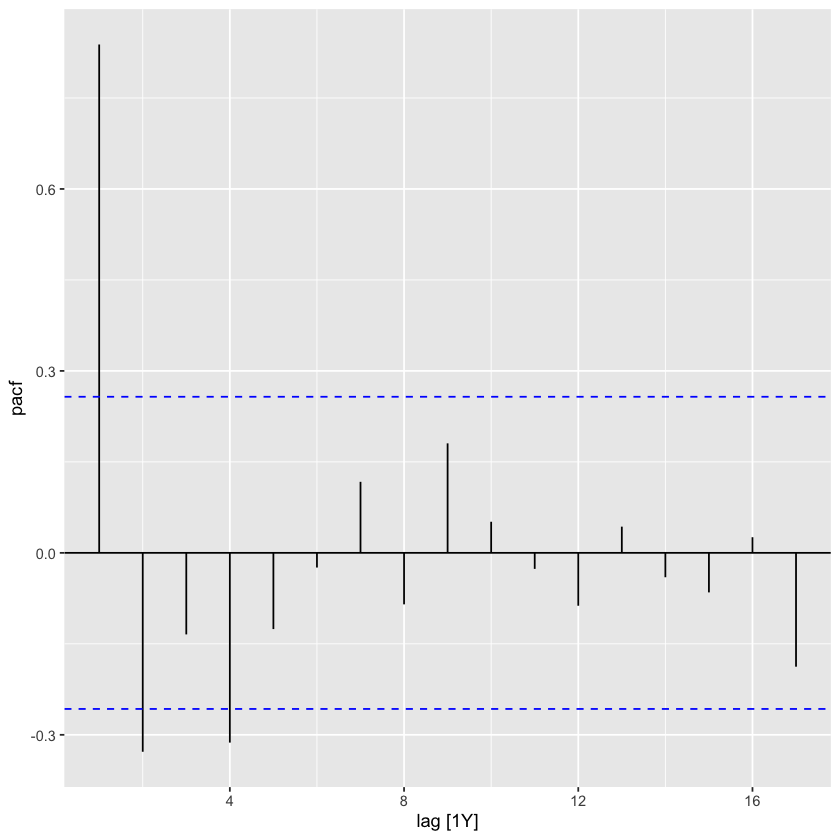

In [51]:
global_economy %>%
  filter(Code == "EGY") %>%
  PACF(Exports) %>%
  autoplot()

- we see that there is a decaying sinusoidal pattern in the ACF.
- the PACF shows the last significant spike at lag 4. 
- This is what you would expect from an ARIMA(4,0,0) model.

In [52]:
fit2 <- global_economy %>%
 filter(Code == "EGY") %>%
 model(
       ARIMA(Exports ~ pdq(4,0,0))
      )
report(fit2)

Series: Exports 
Model: ARIMA(4,0,0) w/ mean 

Coefficients:
         ar1      ar2     ar3      ar4  constant
      0.9861  -0.1715  0.1807  -0.3283    6.6922
s.e.  0.1247   0.1865  0.1865   0.1273    0.3562

sigma^2 estimated as 7.885:  log likelihood=-140.53
AIC=293.05   AICc=294.7   BIC=305.41


- This model is only slightly worse than the ARIMA(2,0,1) model identified by ARIMA() (with an AICc value of 294.70 compared to 294.29).

In [53]:
fit3 <- global_economy %>%
 filter(Code == "EGY") %>%
 model(
       ARIMA(Exports ~ pdq(p=1:3, d=1,q=0:2))
      )
report(fit2)

Series: Exports 
Model: ARIMA(4,0,0) w/ mean 

Coefficients:
         ar1      ar2     ar3      ar4  constant
      0.9861  -0.1715  0.1807  -0.3283    6.6922
s.e.  0.1247   0.1865  0.1865   0.1273    0.3562

sigma^2 estimated as 7.885:  log likelihood=-140.53
AIC=293.05   AICc=294.7   BIC=305.41


# Modelling Procedure:
 
 - 1) Plot the data and identify any unusual observations.
 - 2) If necessary, transform the data (using a Box-Cox transformation) to stabilise the variance.
 - 3) If the data are non-stationary, take first differences of the data until the data are stationary.
 - 4) Examine the ACF/PACF: Is an ARIMA(p,d,q) or ARIMA(0,d,q) model appropriate?
 - 5) Try your chosen model(s), and use the AICc to search for a better model.
 - 6) Check the residuals from your chosen model by plotting the ACF of the residuals, and doing a portmanteau test of the residuals. If they do not look like white noise, try a modified model.
 - 7) Once the residuals look like white noise, calculate forecasts.


## Example: Central African Republic exports


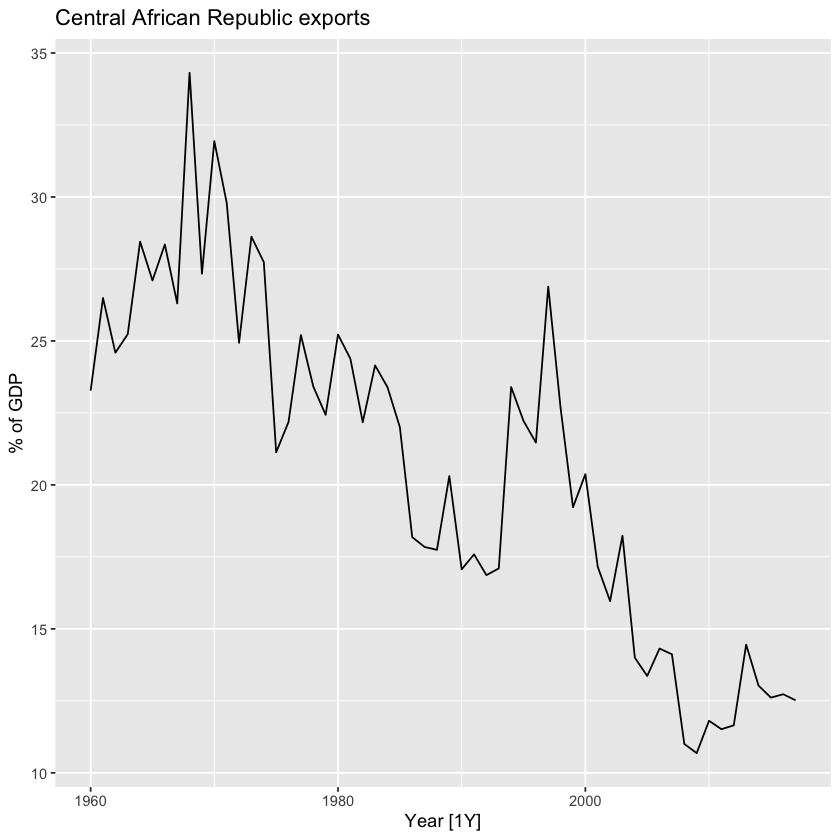

In [54]:
global_economy %>%
 filter(Code == "CAF" ) %>%
 autoplot(Exports) +
 labs(title="Central African Republic exports",
       y="% of GDP")

 ###  1) The time plot shows some non-stationarity, with an overall decline. The improvement in 1994 was due to a new government which overthrew the military junta and had some initial success, before unrest caused further economic decline.
 
 ### 2) There is no evidence of changing variance, so we will not do a Box-Cox transformation.
 
 ### 3) To address the non-stationarity, we will take a first difference of the data.

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


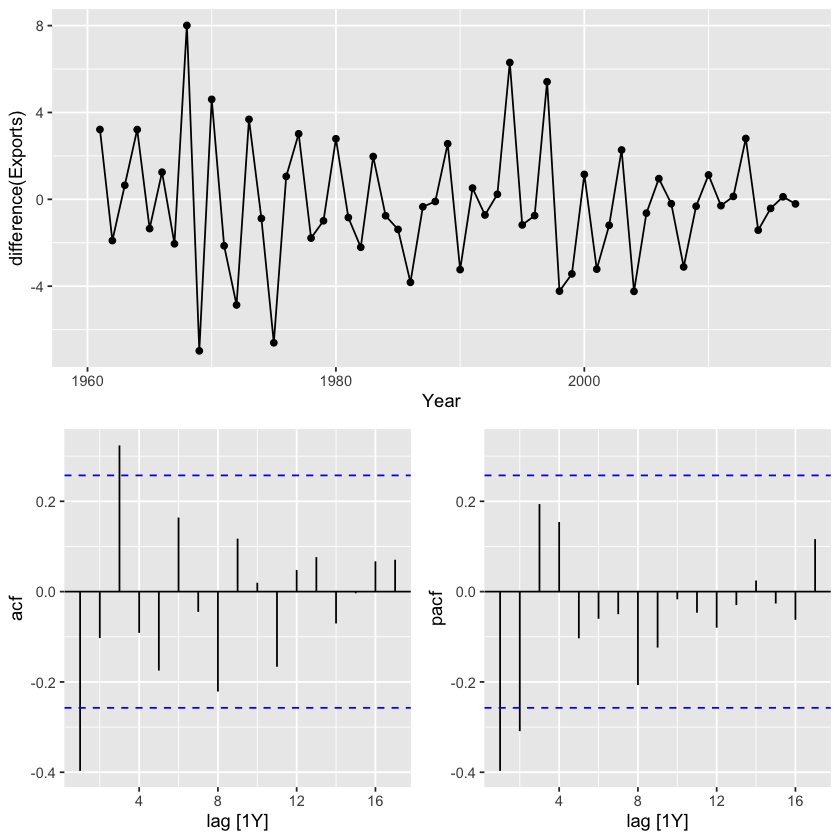

In [57]:
global_economy %>%
  filter(Code == "CAF") %>%
  gg_tsdisplay(difference(Exports), plot_type='partial')

In [59]:
global_economy %>%
  filter(Code == "CAF") %>% 
 features(Exports, unitroot_kpss)

Country,kpss_stat,kpss_pvalue
<fct>,<dbl>,<dbl>
Central African Republic,1.282384,0.01


In [61]:
global_economy %>%
  filter(Code == "CAF") %>% 
 features(difference(Exports), unitroot_kpss)

Country,kpss_stat,kpss_pvalue
<fct>,<dbl>,<dbl>
Central African Republic,0.09223155,0.1


 ### 4) The PACF is suggestive of an AR(2) model; so an initial candidate model is an ARIMA(2,1,0). The ACF suggests an MA(3) model; so an alternative candidate is an ARIMA(0,1,3)

### 5) We fit both an ARIMA(2,1,0) and an ARIMA(0,1,3) model along with two automated model selections, one using the default stepwise procedure, and one working harder to search a larger model space.

- The default procedure will switch to a new “current model” as soon as a better model is identified, without going through all the neighbouring models. 
- The full neighbourhood search is done when greedy=FALSE.

- The default procedure also uses some approximations to speed up the search. These approximations can be avoided with the argument approximation=FALSE. 
- It is possible that the minimum AICc model will not be found due to these approximations, or because of the use of the stepwise procedure. 
- A much larger set of models will be searched if the argument stepwise=FALSE is used.

In [64]:
caf_fit <- global_economy %>%
  filter(Code == "CAF") %>%
  model(arima210 = ARIMA(Exports ~ pdq(2,1,0)),
        arima013 = ARIMA(Exports ~ pdq(0,1,3)),
        stepwise = ARIMA(Exports),
        search = ARIMA(Exports, stepwise=FALSE))

In [69]:
caf_fit

Country,arima210,arima013,stepwise,search
<fct>,<model>,<model>,<model>,<model>
Central African Republic,"<ARIMA(2,1,0)>","<ARIMA(0,1,3)>","<ARIMA(2,1,2)>","<ARIMA(3,1,0)>"


In [68]:
report(caf_fit)

Warning message in report.mdl_df(caf_fit):
“Model reporting is only supported for individual models, so a glance will be shown. To see the report for a specific model, use `select()` and `filter()` to identify a single model.”


Country,.model,sigma2,log_lik,AIC,AICc,BIC,ar_roots,ma_roots
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>
Central African Republic,arima210,6.706113,-134.2684,274.5368,274.9897,280.6660,"-0.871745+1.640802i, -0.871745-1.640802i",
Central African Republic,arima013,6.539210,-133.1238,274.2477,275.0169,282.4199,,"0.843567+1.041312i, -2.026258-0.000000i, 0.843567-1.041312i"
Central African Republic,stepwise,6.415644,-132.0984,274.1968,275.3732,284.4120,"-0.471952+1.085137i, -0.471952-1.085137i","-0.255421+1.415903i, -0.255421-1.415903i"
Central African Republic,search,6.519212,-133.0024,274.0048,274.7740,282.1770,"-0.809865+1.129207i, -0.809865-1.129207i, 2.519729-0.000000i",


In [80]:
caf_fit %>% pivot_longer(!Country, names_to ="Model name", 
                         values_to = "Orders")

Country,Model name,Orders
<fct>,<chr>,<model>
Central African Republic,arima210,"<ARIMA(2,1,0)>"
Central African Republic,arima013,"<ARIMA(0,1,3)>"
Central African Republic,stepwise,"<ARIMA(2,1,2)>"
Central African Republic,search,"<ARIMA(3,1,0)>"


In [81]:
glance(caf_fit)


Country,.model,sigma2,log_lik,AIC,AICc,BIC,ar_roots,ma_roots
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>
Central African Republic,arima210,6.706113,-134.2684,274.5368,274.9897,280.6660,"-0.871745+1.640802i, -0.871745-1.640802i",
Central African Republic,arima013,6.539210,-133.1238,274.2477,275.0169,282.4199,,"0.843567+1.041312i, -2.026258-0.000000i, 0.843567-1.041312i"
Central African Republic,stepwise,6.415644,-132.0984,274.1968,275.3732,284.4120,"-0.471952+1.085137i, -0.471952-1.085137i","-0.255421+1.415903i, -0.255421-1.415903i"
Central African Republic,search,6.519212,-133.0024,274.0048,274.7740,282.1770,"-0.809865+1.129207i, -0.809865-1.129207i, 2.519729-0.000000i",


In [84]:
 glance(caf_fit)%>% arrange(AICc) 

Country,.model,sigma2,log_lik,AIC,AICc,BIC,ar_roots,ma_roots
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>
Central African Republic,search,6.519212,-133.0024,274.0048,274.7740,282.1770,"-0.809865+1.129207i, -0.809865-1.129207i, 2.519729-0.000000i",
Central African Republic,arima210,6.706113,-134.2684,274.5368,274.9897,280.6660,"-0.871745+1.640802i, -0.871745-1.640802i",
Central African Republic,arima013,6.539210,-133.1238,274.2477,275.0169,282.4199,,"0.843567+1.041312i, -2.026258-0.000000i, 0.843567-1.041312i"
Central African Republic,stepwise,6.415644,-132.0984,274.1968,275.3732,284.4120,"-0.471952+1.085137i, -0.471952-1.085137i","-0.255421+1.415903i, -0.255421-1.415903i"


In [86]:
caf_fit %>% pivot_longer(!Country, names_to ="Model name", 
                         values_to = "Orders")

Country,Model name,Orders
<fct>,<chr>,<model>
Central African Republic,arima210,"<ARIMA(2,1,0)>"
Central African Republic,arima013,"<ARIMA(0,1,3)>"
Central African Republic,stepwise,"<ARIMA(2,1,2)>"
Central African Republic,search,"<ARIMA(3,1,0)>"


In [85]:
glance(caf_fit) %>% arrange(AICc) %>% select(.model:BIC)


.model,sigma2,log_lik,AIC,AICc,BIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
search,6.519212,-133.0024,274.0048,274.7740,282.1770
arima210,6.706113,-134.2684,274.5368,274.9897,280.6660
arima013,6.539210,-133.1238,274.2477,275.0169,282.4199
stepwise,6.415644,-132.0984,274.1968,275.3732,284.4120


-  The four models have almost identical AICc values. 
- Of the models fitted, the full search has found that an ARIMA(3,1,0) gives the lowest AICc value, closely followed by the ARIMA(2,1,0) and ARIMA(0,1,3) — the latter two being the models that we guessed from the ACF and PACF plots. 
- The automated stepwise selection has identified an ARIMA(2,1,2) model, which has the highest AICc value of the four models.

### 6) The ACF plot of the residuals from the ARIMA(3,1,0) model shows that all autocorrelations are within the threshold limits, indicating that the residuals are behaving like white noise.

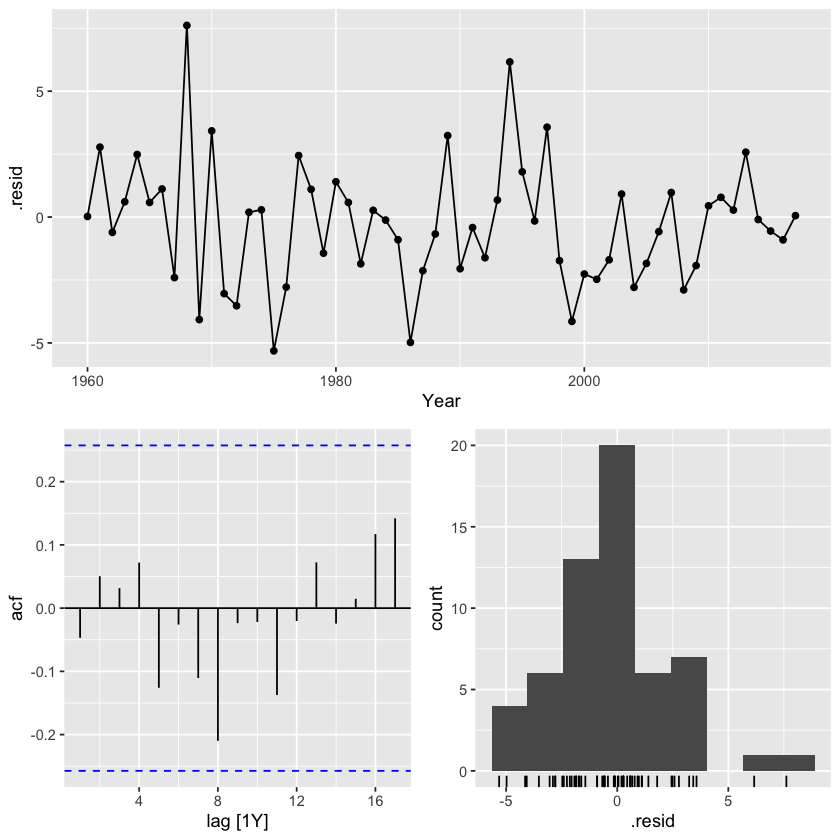

In [87]:
caf_fit %>%
  select(search) %>%
  gg_tsresiduals()

In [88]:
augment(caf_fit)

Country,.model,Year,Exports,.fitted,.resid,.innov
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Central African Republic,arima210,1960,23.27272,23.24945,0.02327271,0.02327271
Central African Republic,arima210,1961,26.49007,23.65660,2.83347036,2.83347036
Central African Republic,arima210,1962,24.59017,25.20269,-0.61252939,-0.61252939
Central African Republic,arima210,1963,25.23659,24.61772,0.61887423,0.61887423
Central African Republic,arima210,1964,28.44827,25.46047,2.98780034,2.98780034
Central African Republic,arima210,1965,27.10027,26.63899,0.46128193,0.46128193
Central African Republic,arima210,1966,28.35052,26.85073,1.49978558,1.49978558
Central African Republic,arima210,1967,26.30273,28.10957,-1.80683813,-1.80683813
Central African Republic,arima210,1968,34.31230,26.97478,7.33751346,7.33751346


In [89]:
augment(caf_fit) %>%
 filter(.model=="search") %>%
 features(.innov, ljung_box,lag=10,dof=3)

Country,.model,lb_stat,lb_pvalue
<fct>,<chr>,<dbl>,<dbl>
Central African Republic,search,5.751532,0.5690427


- A portmanteau test returns a large p-value, also suggesting that the residuals are white noise.

###  7) Forecasts from the chosen model

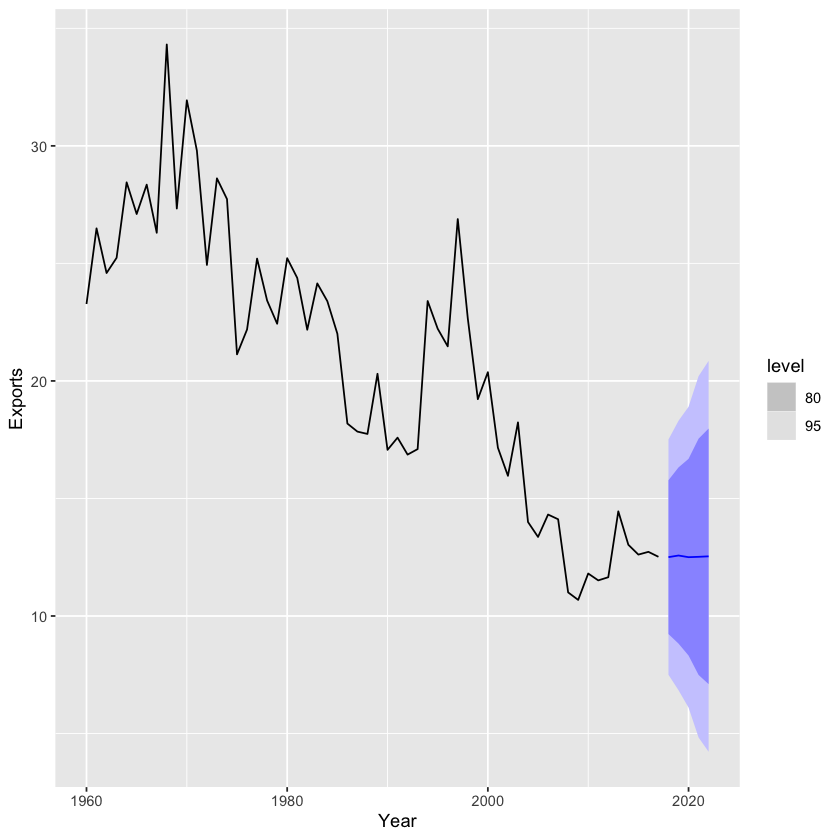

In [91]:
caf_fit %>%
 forecast(h=5) %>%
 filter(.model== 'search') %>%
autoplot(global_economy)

- Note that the mean forecasts look very similar to what we would get with a random walk (equivalent to an ARIMA(0,1,0)).

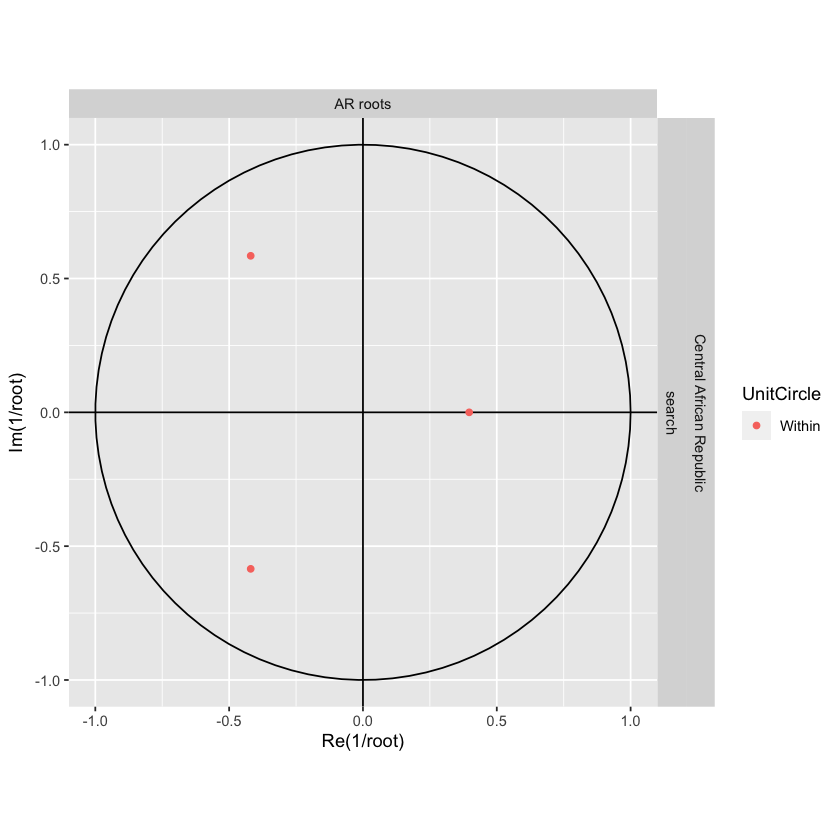

In [92]:
gg_arma(caf_fit %>% select(Country, search))


- The three orange dots in the plot correspond to the roots of the polynomials  
$\phi(B)=$.
- They are all inside the unit circle, as we would expect because fable ensures the fitted model is both stationary and invertible. 
- Any roots close to the unit circle may be numerically unstable, and the corresponding model will not be good for forecasting.

# 3. Seasonal ARIMA Models

### Example: Monthly US leisure and hospitality employment

- Data: monthly US employment data for leisure and hospitality jobs from January 2000 to September 2019


In [95]:
us_employment

Month,Series_ID,Title,Employed
<mth>,<chr>,<chr>,<dbl>
1939 Jan,CEU0500000001,Total Private,25338
1939 Feb,CEU0500000001,Total Private,25447
1939 Mar,CEU0500000001,Total Private,25833
1939 Apr,CEU0500000001,Total Private,25801
1939 May,CEU0500000001,Total Private,26113
1939 Jun,CEU0500000001,Total Private,26485
1939 Jul,CEU0500000001,Total Private,26481
1939 Aug,CEU0500000001,Total Private,26848
1939 Sep,CEU0500000001,Total Private,27468


In [98]:
leisure <- us_employment %>%
 filter( Title== "Leisure and Hospitality", year(Month)>2000  ) %>%
 mutate( Employed =Employed/1000)

leisure

Month,Series_ID,Title,Employed
<mth>,<chr>,<chr>,<dbl>
2001 Jan,CEU7000000001,Leisure and Hospitality,11.328
2001 Feb,CEU7000000001,Leisure and Hospitality,11.462
2001 Mar,CEU7000000001,Leisure and Hospitality,11.645
2001 Apr,CEU7000000001,Leisure and Hospitality,11.936
2001 May,CEU7000000001,Leisure and Hospitality,12.297
2001 Jun,CEU7000000001,Leisure and Hospitality,12.687
2001 Jul,CEU7000000001,Leisure and Hospitality,12.757
2001 Aug,CEU7000000001,Leisure and Hospitality,12.716
2001 Sep,CEU7000000001,Leisure and Hospitality,12.273


In [99]:
leisure %>%  select(Month, Employed)

Month,Employed
<mth>,<dbl>
2001 Jan,11.328
2001 Feb,11.462
2001 Mar,11.645
2001 Apr,11.936
2001 May,12.297
2001 Jun,12.687
2001 Jul,12.757
2001 Aug,12.716
2001 Sep,12.273


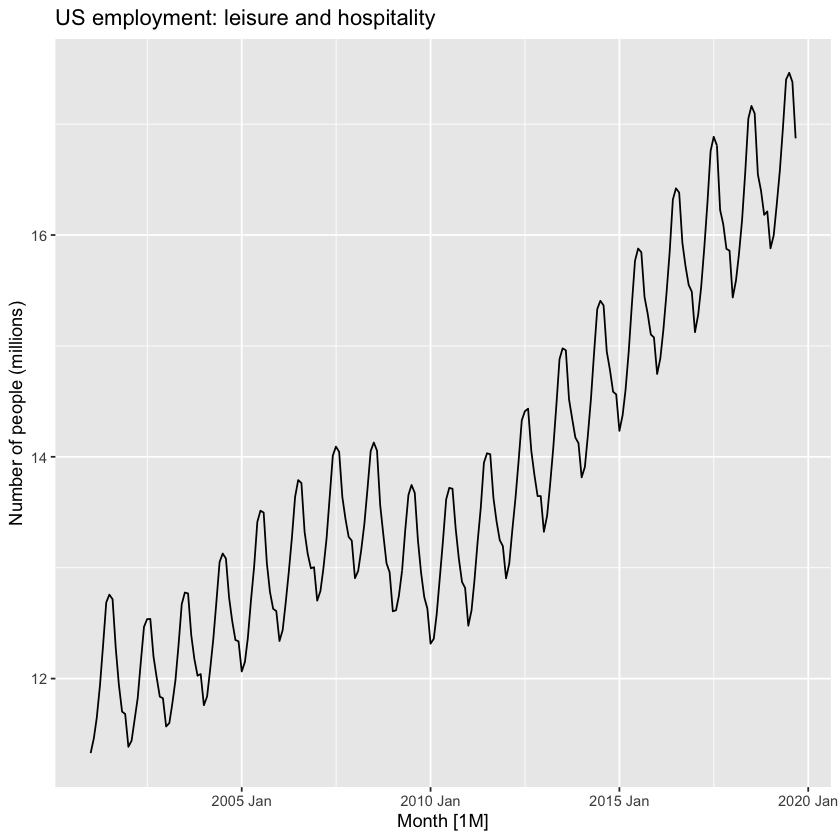

In [102]:
autoplot(leisure, Employed)  +
labs(title = "US employment: leisure and hospitality",
       y="Number of people (millions)")

- The data are clearly non-stationary, with strong seasonality and a nonlinear trend, so we will first take a seasonal difference

The seasonally differenced data are:

Warning message:
“Removed 12 row(s) containing missing values (geom_path).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”


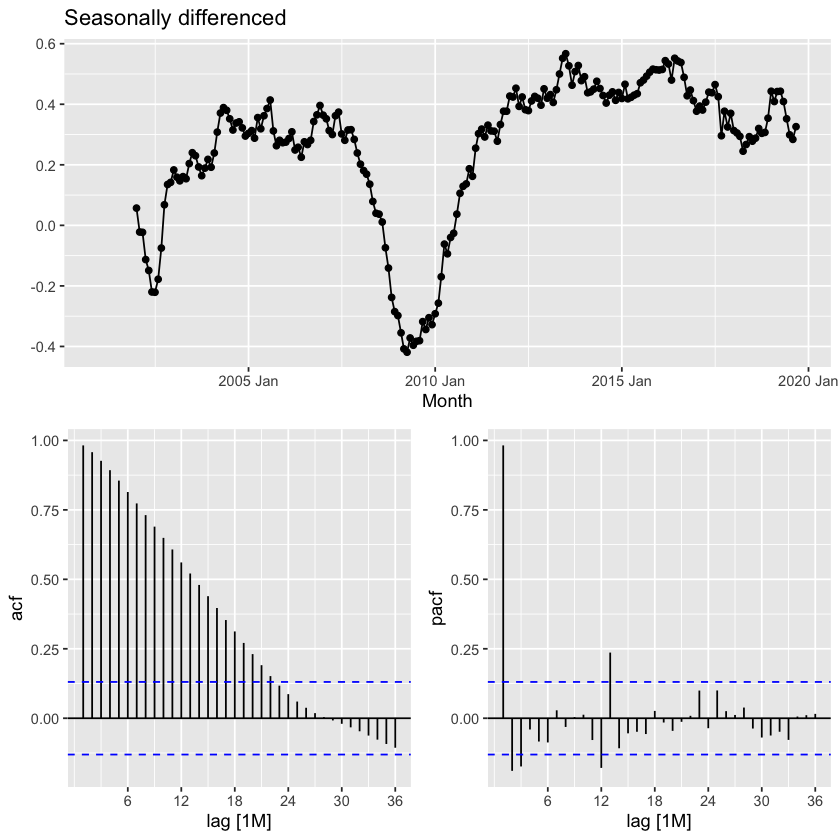

In [104]:
leisure %>% 
 gg_tsdisplay(difference(Employed,12), plot_type='partial', lag=36) +
  labs(title="Seasonally differenced", y="")

These are also clearly non-stationary, so we take a further first difference

Warning message:
“Removed 13 row(s) containing missing values (geom_path).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”


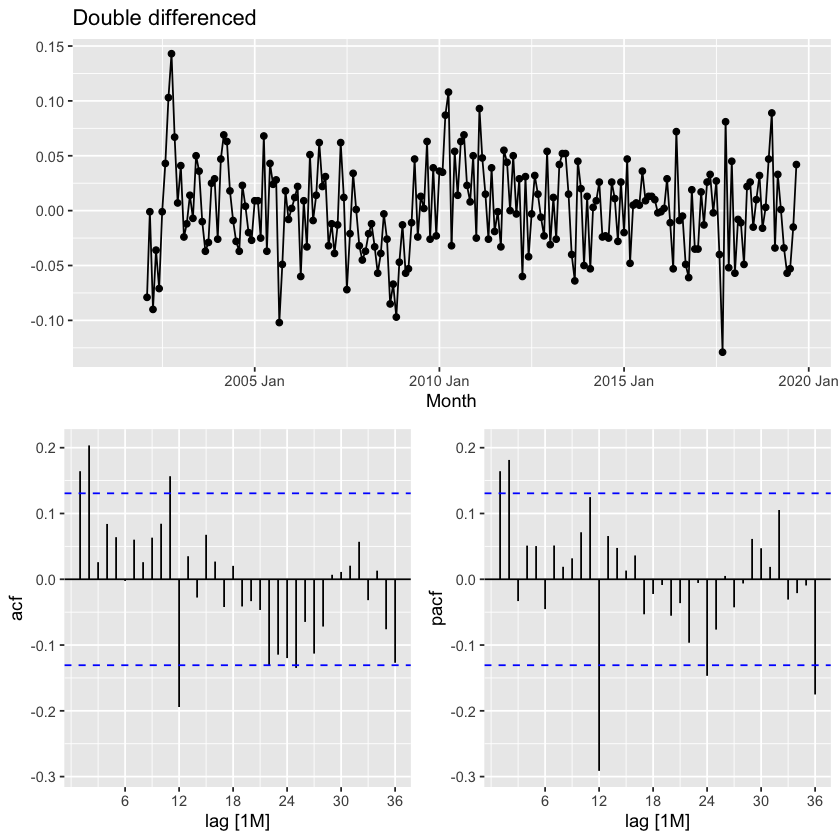

In [105]:
leisure %>% 
 gg_tsdisplay(difference(Employed,12) %>% difference(),
              plot_type='partial', lag=36) +
  labs(title="Double differenced", y="")

- Now is to find an appropriate ARIMA model based on the ACF and PACF.
- The significant spike at lag 2 in the ACF suggests a non-seasonal MA(2) component.
- The significant spike at lag 12 in the ACF suggests a seasonal MA(1) component.
- Start with ARIMA$(0,1,2)(0,1,1)_{12}$.


- If we had started with the PACF, we may have selected an ARIMA$(2,1,0)(0,1,1)_{12} $ model.
  model — using the PACF to select the non-seasonal part of the model and the ACF to select the seasonal part of the model.
- We will also include an automatically selected model. By setting stepwise=FALSE and approximation=FALSE, we are making R work extra hard to find a good model.

In [114]:
fit <- leisure %>%
 model(
  `arima012011` = ARIMA(Employed ~ pdq(0,1,2)+PDQ(0,1,1)),
  `arima210011` = ARIMA(Employed ~ pdq(2,1,0)+PDQ(0,1,1)),
  auto = ARIMA(Employed, stepwise =FALSE, approx=FALSE)
       )

In [116]:
fit

Series_ID,arima012011,arima210011,auto
<chr>,<model>,<model>,<model>
CEU7000000001,"<ARIMA(0,1,2)(0,1,1)[12]>","<ARIMA(2,1,0)(0,1,1)[12]>","<ARIMA(2,1,0)(1,1,1)[12]>"


In [115]:
report(fit)

Warning message in report.mdl_df(fit):
“Model reporting is only supported for individual models, so a glance will be shown. To see the report for a specific model, use `select()` and `filter()` to identify a single model.”


Series_ID,.model,sigma2,log_lik,AIC,AICc,BIC,ar_roots,ma_roots
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>
CEU7000000001,arima012011,0.001462792,391.4497,-774.8994,-774.7062,-761.4731,,"0.5296757+0.9174252i, -0.9174252+0.5296757i, -0.5296757-0.9174252i, 0.9174252-0.5296757i, 0.0000000+1.0593514i, -1.0593514-0.0000000i, 0.0000000-1.0593514i, 1.0593514+0.0000000i, -0.5296757+0.9174252i, -0.9174252-0.5296757i, 0.5296757-0.9174252i, 0.9174252+0.5296757i, -0.5341239+2.0807422i, -0.5341239-2.0807422i"
CEU7000000001,arima210011,0.001454293,392.0945,-776.1890,-775.9958,-762.7627,"1.792033-0i, -2.874936+0i","0.5300107+0.9180055i, -0.9180055+0.5300107i, -0.5300107-0.9180055i, 0.9180055-0.5300107i, 0.0000000+1.0600215i, -1.0600215-0.0000000i, 0.0000000-1.0600215i, 1.0600215+0.0000000i, -0.5300107+0.9180055i, -0.9180055-0.5300107i, 0.5300107-0.9180055i, 0.9180055+0.5300107i"
CEU7000000001,auto,0.001415339,394.9620,-779.9239,-779.6327,-763.1410,"0.5484674+0.9499734i, -0.9499734+0.5484674i, -0.5484674-0.9499734i, 0.9499734-0.5484674i, 0.0000000+1.0969348i, -1.0969348+0.0000000i, 0.0000000-1.0969348i, 1.0969348+0.0000000i, -0.5484674+0.9499734i, -0.9499734-0.5484674i, 0.5484674-0.9499734i, 0.9499734+0.5484674i, 1.8897054-0.0000000i, -2.8522803-0.0000000i","0.5120893+0.8869648i, -0.8869648+0.5120893i, -0.5120893-0.8869648i, 0.8869648-0.5120893i, 0.0000000+1.0241787i, -1.0241787-0.0000000i, 0.0000000-1.0241787i, 1.0241787+0.0000000i, -0.5120893+0.8869648i, -0.8869648-0.5120893i, 0.5120893-0.8869648i, 0.8869648+0.5120893i"


In [117]:
fit %>% pivot_longer(!Series_ID, names_to = "Model name",
                     values_to = "Orders")

Series_ID,Model name,Orders
<chr>,<chr>,<model>
CEU7000000001,arima012011,"<ARIMA(0,1,2)(0,1,1)[12]>"
CEU7000000001,arima210011,"<ARIMA(2,1,0)(0,1,1)[12]>"
CEU7000000001,auto,"<ARIMA(2,1,0)(1,1,1)[12]>"


In [107]:
fit

Series_ID,arima012011,arima210011,auto
<chr>,<model>,<model>,<model>
CEU7000000001,"<ARIMA(0,1,2)(0,1,1)[12]>","<ARIMA(2,1,0)(0,1,1)[12]>","<ARIMA(2,1,0)(1,1,1)[12]>"


In [120]:
glance(caf_fit) %>% arrange(AICc) %>% select(.model:BIC)


.model,sigma2,log_lik,AIC,AICc,BIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
search,6.519212,-133.0024,274.0048,274.7740,282.1770
arima210,6.706113,-134.2684,274.5368,274.9897,280.6660
arima013,6.539210,-133.1238,274.2477,275.0169,282.4199
stepwise,6.415644,-132.0984,274.1968,275.3732,284.4120


- The three fitted models have similar AICc values, with the automatically selected model being a little better



The residuals for the best model are

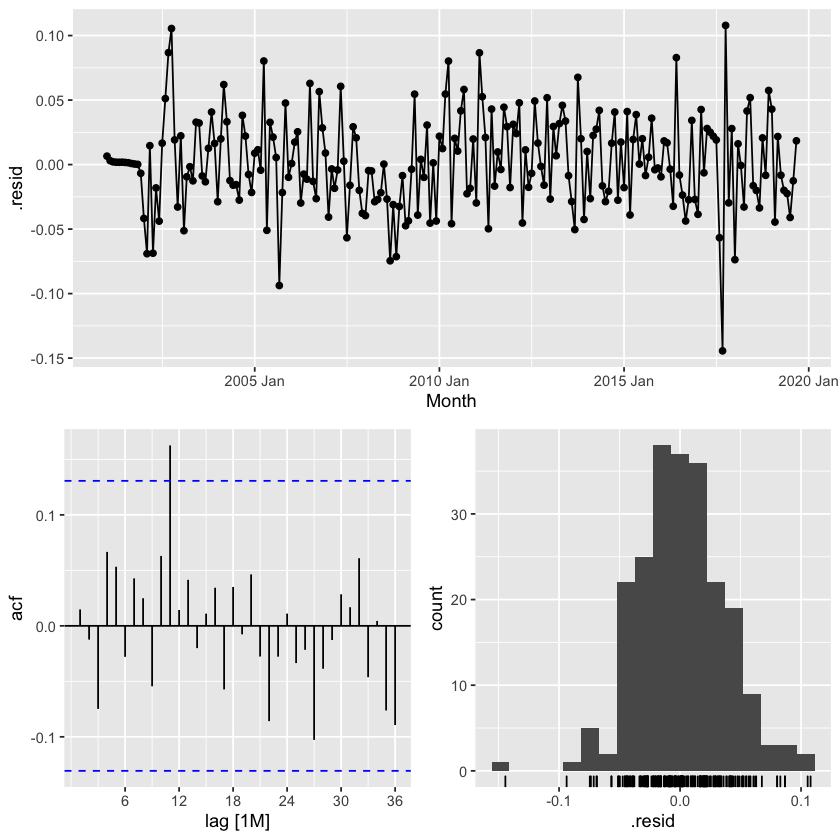

In [121]:
fit %>% select(auto) %>% gg_tsresiduals(lag=36)

- One small but significant spike (at lag 11) out of 36 is still consistent with white noise. 

we use a Ljung-Box test, which has a large p-value, confirming that the residuals are similar to white noise.

In [122]:
augment(fit) %>% features(.innov,ljung_box, lag=24, dof=4)

Series_ID,.model,lb_stat,lb_pvalue
<chr>,<chr>,<dbl>,<dbl>
CEU7000000001,arima012011,22.38744,0.3198627
CEU7000000001,arima210011,18.91786,0.5271706
CEU7000000001,auto,16.57691,0.6802512


- now have a seasonal ARIMA model that passes the required checks and is ready for forecasting

### Forecasts from the model for the next three year

In [124]:
augment(fit) 

Series_ID,.model,Month,Employed,.fitted,.resid,.innov
<chr>,<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>
CEU7000000001,arima012011,2001 Jan,11.328,11.32146,0.0065402223,0.0065402223
CEU7000000001,arima012011,2001 Feb,11.462,11.45897,0.0030286690,0.0030286690
CEU7000000001,arima012011,2001 Mar,11.645,11.64286,0.0021373878,0.0021373878
CEU7000000001,arima012011,2001 Apr,11.936,11.93415,0.0018497474,0.0018497474
CEU7000000001,arima012011,2001 May,12.297,12.29520,0.0018021184,0.0018021184
CEU7000000001,arima012011,2001 Jun,12.687,12.68514,0.0018581930,0.0018581930
CEU7000000001,arima012011,2001 Jul,12.757,12.75534,0.0016564187,0.0016564187
CEU7000000001,arima012011,2001 Aug,12.716,12.71459,0.0014099740,0.0014099740
CEU7000000001,arima012011,2001 Sep,12.273,12.27217,0.0008337508,0.0008337508


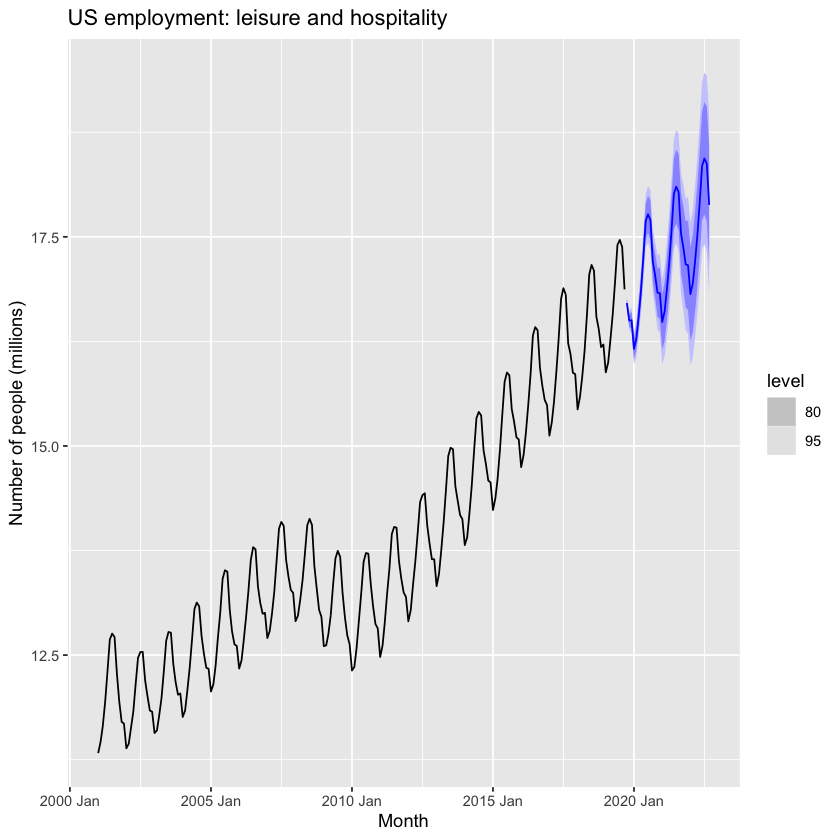

In [128]:
forecast(fit, h=36) %>%
 filter(.model == 'auto') %>% 
 autoplot(leisure)  +
  labs(title = "US employment: leisure and hospitality",
       y="Number of people (millions)")

### Example: Corticosteroid drug sales in Australia

- data: monthly corticosteroid drug sales in Australia

In [129]:
h02 <- PBS %>%
  filter(ATC2 == "H02") %>%
  summarise(Cost = sum(Cost)/1e6)
h02 %>%
  mutate(log(Cost))

Month,Cost,log(Cost)
<mth>,<dbl>,<dbl>
1991 Jul,0.4297950,-0.84444693
1991 Aug,0.4009060,-0.91402829
1991 Sep,0.4321590,-0.83896170
1991 Oct,0.4925430,-0.70817351
1991 Nov,0.5023690,-0.68842037
1991 Dec,0.6026520,-0.50641536
1992 Jan,0.6601190,-0.41533516
1992 Feb,0.3362200,-1.08998957
1992 Mar,0.3513480,-1.04597809


In [130]:
h02 %>%
  pivot_longer(-Month) 

Month,name,value
<mth>,<chr>,<dbl>
1991 Jul,Cost,0.4297950
1991 Aug,Cost,0.4009060
1991 Sep,Cost,0.4321590
1991 Oct,Cost,0.4925430
1991 Nov,Cost,0.5023690
1991 Dec,Cost,0.6026520
1992 Jan,Cost,0.6601190
1992 Feb,Cost,0.3362200
1992 Mar,Cost,0.3513480


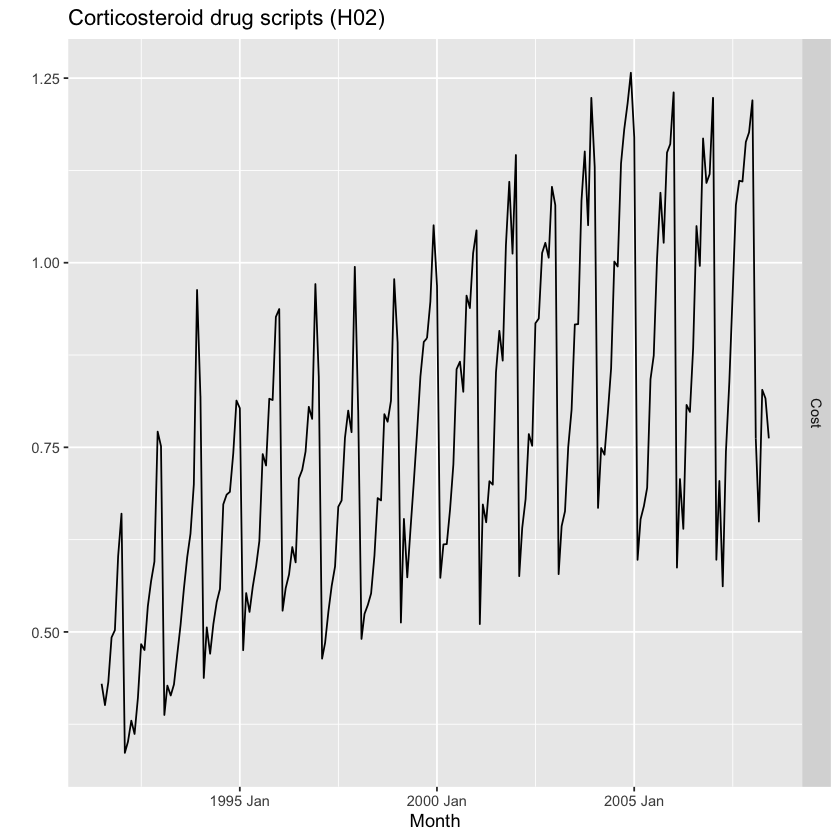

In [136]:
h02 %>%
pivot_longer(-Month) %>%
 ggplot(aes(x = Month, y = value)) +
geom_line() +
  facet_grid(name ~ ., scales = "free_y") +
  labs(y="", title="Corticosteroid drug scripts (H02)")

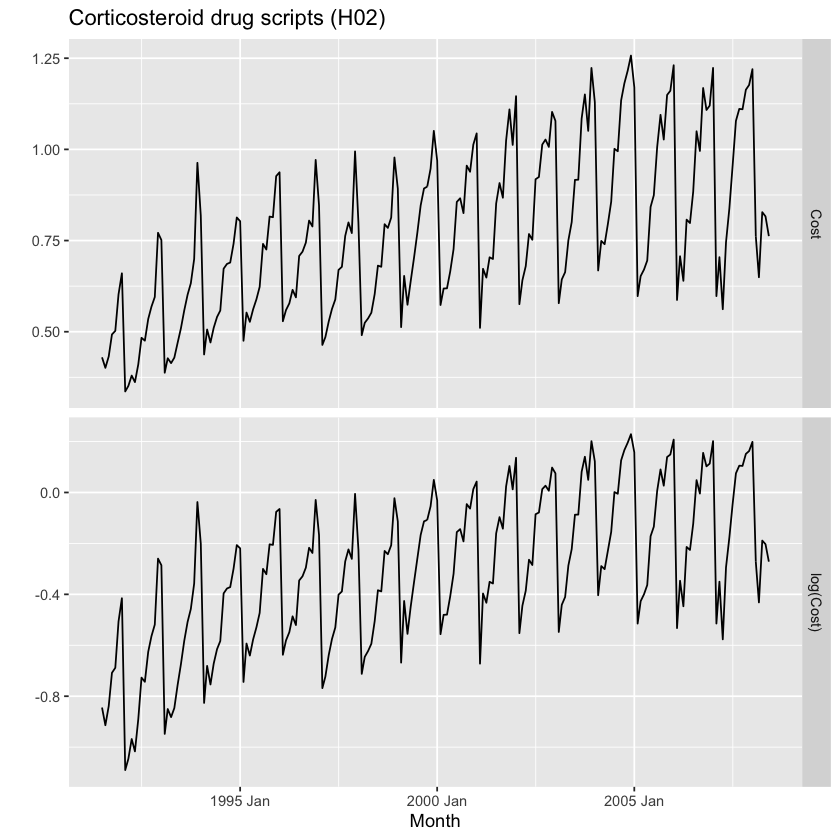

In [135]:
h02 %>%
  mutate(log(Cost)) %>%
  pivot_longer(-Month) %>%
  ggplot(aes(x = Month, y = value)) +
  geom_line() +
  facet_grid(name ~ ., scales = "free_y") +
  labs(y="", title="Corticosteroid drug scripts (H02)")

### Data from July 1991 to June 2008 are plotted.  There is a small increase in the variance with the level, so we take logarithms to stabilise the variance.



- The data are strongly seasonal and obviously non-stationary, so seasonal differencing will be used

 - The data are strongly seasonal and obviously non-stationary, so seasonal differencing will be used. The seasonally differenced data are shown:
 


Warning message:
“Removed 12 row(s) containing missing values (geom_path).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”


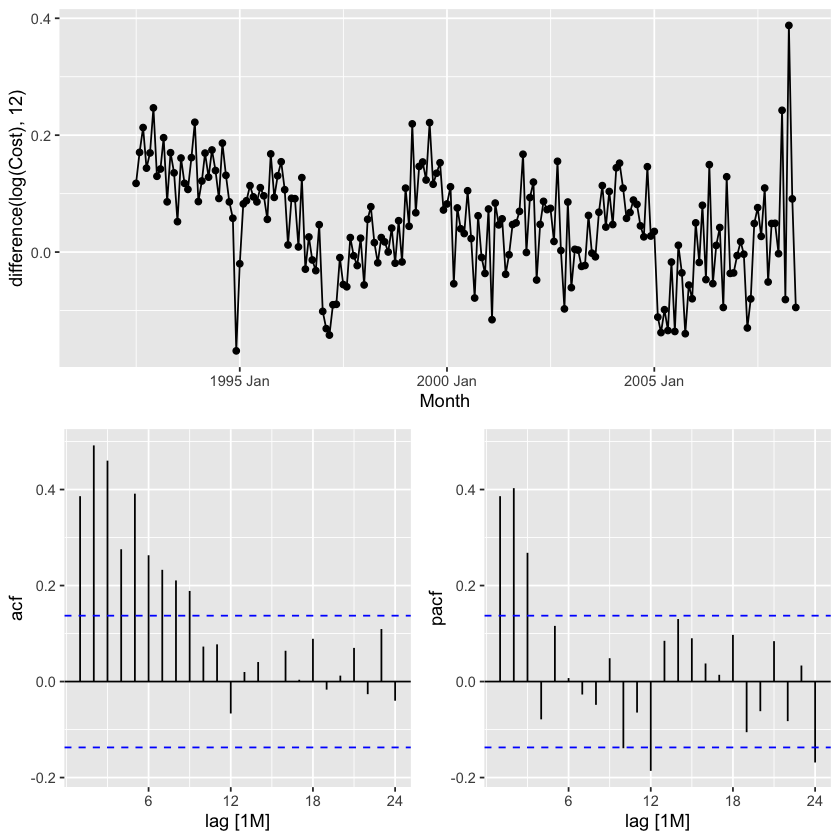

In [137]:
h02 %>% gg_tsdisplay(difference(log(Cost), 12),
                     plot_type='partial', lag_max = 24)

-  it is not clear at this point whether we should do another difference or not. We decide not to, but the choice is not obvious.

In [147]:
fit <- h02 %>%
 model(
  `arima300210` = ARIMA(log(Cost) ~ pdq(3,0,0)+PDQ(2,1,0)),
            auto = ARIMA(log(Cost), stepwise =FALSE, approx=FALSE)
       )

In [149]:
fit

arima300210,auto
<model>,<model>
"<ARIMA(3,0,0)(2,1,0)[12] w/ drift>","<ARIMA(2,1,3)(0,1,1)[12]>"


In [150]:
report(fit)

Warning message in report.mdl_df(fit):
“Model reporting is only supported for individual models, so a glance will be shown. To see the report for a specific model, use `select()` and `filter()` to identify a single model.”


.model,sigma2,log_lik,AIC,AICc,BIC,ar_roots,ma_roots
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>
arima300210,0.004565567,245.7825,-477.5650,-476.9563,-454.7625,"0.6697444+0.8134681i, -0.8134681+0.6697444i, -0.6697444-0.8134681i, 0.8134681-0.6697444i, 0.3696119+0.9867498i, -1.0393563-0.1732816i, -0.3696119-0.9867498i, 0.9867498-0.3696119i, 0.1732816+1.0393563i, -1.0393563+0.1732816i, -0.1732816-1.0393563i, 1.0393563-0.1732816i, -0.1732816+1.0393563i, -0.9867498-0.3696119i, 0.3696119-0.9867498i, 0.8134681+0.6697444i, -0.3696119+0.9867498i, -0.8134681-0.6697444i, 0.6697444-0.8134681i, 0.9867498+0.3696119i, -0.6697444+0.8134681i, 0.1732816-1.0393563i, 1.0677029-0.0000000i, 1.0393563+0.1732816i, -0.9867498+0.3696119i, -0.9964026-1.1477440i, -0.9964026+1.1477440i",
auto,0.004203287,250.7988,-487.5976,-486.9856,-464.8317,"-0.6103473+0.9082476i, -0.6103473-0.9082476i","0.5180930+0.8973634i, -1.0361860-0.0000000i, -0.5180930-0.8973634i, 0.8973634-0.5180930i, 0.0000000+1.0361860i, -0.8973634+0.5180930i, 0.0000000-1.0361860i, 1.0361860+0.0000000i, -0.5180930+0.8973634i, -0.8973634-0.5180930i, 0.5180930-0.8973634i, 0.8973634+0.5180930i, -0.5378146+1.0577463i, -0.5378146-1.0577463i, 1.6886148+0.0000000i"


In [151]:
glance(fit) %>% arrange(AICc) %>% select(.model:BIC)


.model,sigma2,log_lik,AIC,AICc,BIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auto,0.004203287,250.7988,-487.5976,-486.9856,-464.8317
arima300210,0.004565567,245.7825,-477.5650,-476.9563,-454.7625


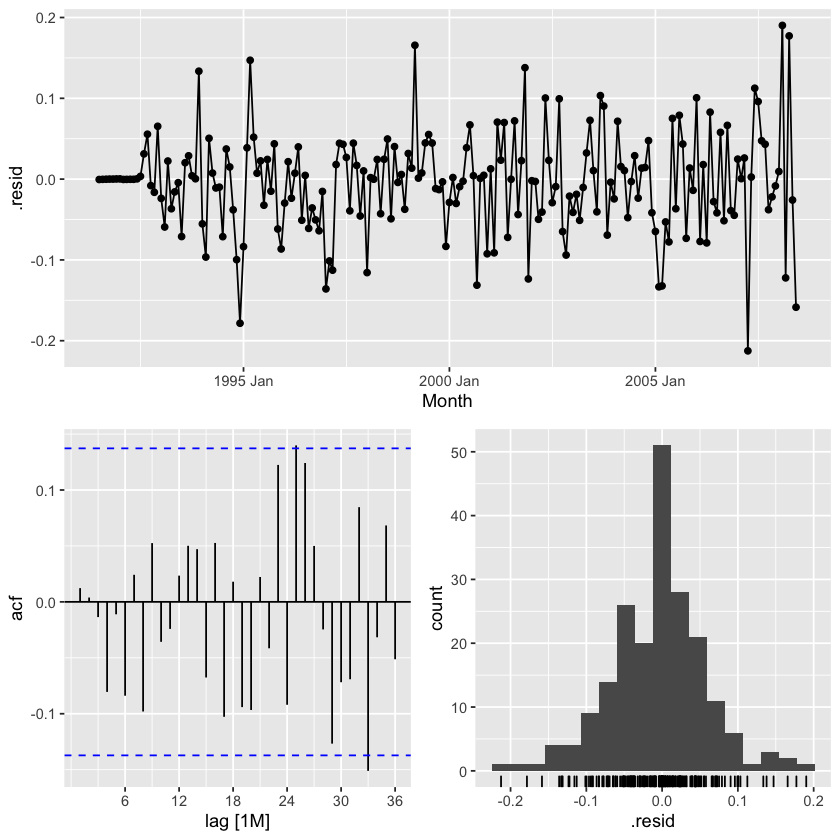

In [152]:
fit %>%select(auto) %>% gg_tsresiduals(lag_max=36)


In [153]:
augment(fit) %>%
  features(.innov, ljung_box, lag = 36, dof = 6)

.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
arima300210,55.83890,0.002849015
auto,46.14897,0.030072540


### However, the auto model still fail the Ljung-Box test for 36 lag.
### Sometimes it is just not possible to find a model that passes all of the tests.

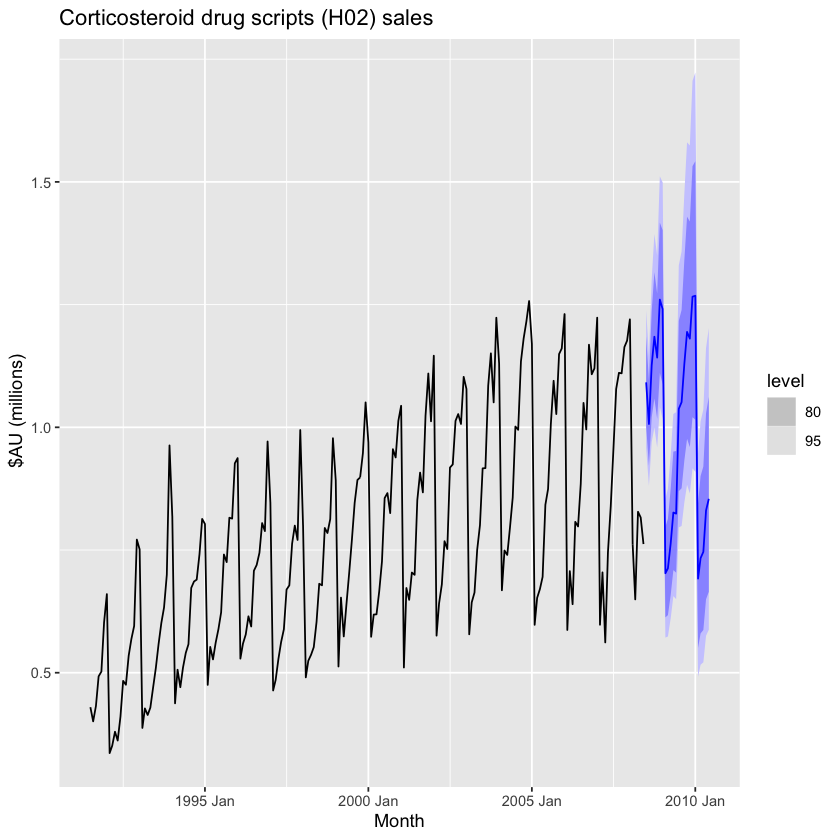

In [154]:
h02 %>%
  model(ARIMA(log(Cost) ~ 0 + pdq(3,0,1) + PDQ(0,1,2))) %>%
  forecast() %>%
  autoplot(h02) +
  labs(y=" $AU (millions)",
       title="Corticosteroid drug scripts (H02) sales")